# Cardiovascular disease analysis: Multiple (AMC) Correspondence Analysis

# Cardiovascular diseases (CVDs)
Cardiovascular diseases (CVDs) are the leading cause of death globally, causing an estimated 17.9 million deaths annually. The primary contributors to CVDs include coronary heart disease, cerebrovascular disease, and other conditions that affect the heart and blood vessels. These diseases predominantly affect low- and middle-income countries, where more than three-quarters of CVD deaths occur. Key behavioral risk factors include unhealthy diet, physical inactivity, tobacco use, and harmful use of alcohol, while environmental factors such as air pollution also play a role.

Prevention and management of CVDs focus on addressing these risk factors and promoting healthy lifestyle choices. Early detection and management of raised blood pressure, blood glucose, and blood lipids are crucial, along with encouraging regular physical activity, a healthy diet rich in fruits and vegetables, and reducing salt and harmful alcohol consumption. By addressing these risk factors, it is possible to reduce the burden of CVDs and improve global health outcomes.

SOURCE: World Health Organization [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-%28cvds%29)

#### Instalando os pacotes

In [1]:
! pip install pandas
! pip install numpy
! pip install scipy
! pip install plotly
! pip install seaborn
! pip install matplotlib
! pip install statsmodels
! pip install prince

#### Importando os pacotes necessários

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go
from itertools import combinations

#### Análise de Correspondência Múltipla (MCA)

In [3]:
# Importando o banco de dados

dados_mca = pd.read_excel("dados_cor_acm.xlsx")
# Fonte: adaptado de https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

#### Analisando as variáveis

In [4]:
# Algumas variáveis do banco de dados são métricas
# Um procedimento aplicável a elas é a categorização

# Vamos categorizar utilizando um critério quantitativo
## A função "qcut" do pandas é usada para categorizar variáveis métricas

dados_mca['idade'] = pd.qcut(dados_mca['idade'], 3, labels=list(['menores_idades', 'idades_medias', 'maiores_idades'])) # A 'idade' vai ser categorizada em 3 categorias: 'menores_idades', 'idades_medias', 'maiores_idades'          
dados_mca['ps.descanco'] = pd.qcut(dados_mca['ps.descanco'], 3, labels=list(['ps_baixa', 'ps_media', 'ps_alta']))       # A 'ps.descanco' vai ser categorizada em 3 categorias:  'ps_baixa', 'ps_media', 'ps_alta'
dados_mca['colesterol'] = pd.qcut(dados_mca['colesterol'], 3, labels=list(['col_baixo', 'col_medio', 'col_alto']))      # A 'colesterol' vai ser categorizada em 3 categorias:  'col_baixo', 'col_medio', 'col_alto'
dados_mca['bc.max'] = pd.qcut(dados_mca['bc.max'], 3, labels=list(['bc_baixo', 'bc_medio', 'bc_alto']))                 # A 'bc.max' vai ser categorizada em 3 categorias:  'bc_baixo', 'bc_medio', 'bc_alto'

#### Analisando as tabelas de contingência

In [5]:
# A seguir, a função extrai todas as tabelas (todas as combinações) de contingência possíveis

for item in list(combinations(dados_mca.columns, 2)):
    print(item, "\n")
    tabela = pd.crosstab(dados_mca[item[0]], dados_mca[item[1]])
    
    print(tabela)
    
    chi2, pvalor, gl, freq_esp = chi2_contingency(tabela)

    print(f"estatística qui²: {round(chi2, 2)}")
    print(f"p-valor da estatística: {round(pvalor, 4)}", "\n")

('idade', 'sexo') 

sexo            Feminino  Masculino
idade                              
menores_idades        78        238
idades_medias         62        252
maiores_idades        53        235
estatística qui²: 4.05
p-valor da estatística: 0.132 

('idade', 'dor.peito') 

dor.peito       Assintomatico  Atipica  Sem_Dor  Tipica
idade                                                  
menores_idades            142       86       74      14
idades_medias             169       67       70       8
maiores_idades            185       20       59      24
estatística qui²: 55.77
p-valor da estatística: 0.0 

('idade', 'ps.descanco') 

ps.descanco     ps_baixa  ps_media  ps_alta
idade                                      
menores_idades       153       115       48
idades_medias         92       157       65
maiores_idades        62       119      107
estatística qui²: 74.48
p-valor da estatística: 0.0 

('idade', 'colesterol') 

colesterol      col_baixo  col_medio  col_alto
idade       

#### Elaborando a MCA

In [6]:
mca = prince.MCA(n_components=2).fit(dados_mca)

# Vamos parametrizar a MCA para duas dimensões

#### Quantidade total de dimensões

In [7]:
# Quantidade de dimensões = qtde total de categorias - qtde de variáveis

# Quantidade total de categorias
mca.J_

# Quantidade de variáveis na análise
mca.K_

# Quantidade de dimensões
quant_dim = mca.J_ - mca.K_

# Resumo das informações
print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")

quantidade total de categorias: 27
quantidade de variáveis: 10
quantidade de dimensões: 17


#### Obtendo os eigenvalues

In [8]:
tabela_autovalores = mca.eigenvalues_summary

print(tabela_autovalores)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.285        16.78%                     16.78%
1              0.138         8.14%                     24.92%


#### Inércia principal total

In [9]:
# Soma de todos os autovalores (todas as dimensões existentes)

print(mca.total_inertia_)

1.6999999999999933


#### Obtendo as coordenadas principais das categorias das variáveis

In [10]:
coord_burt = mca.column_coordinates(dados_mca)

print(coord_burt)

                                    0         1
idade_menores_idades         0.632520 -0.536944
idade_idades_medias         -0.064234  0.000895
idade_maiores_idades        -0.623982  0.588171
sexo_Feminino                0.817786  0.573631
sexo_Masculino              -0.217700 -0.152704
dor.peito_Assintomatico     -0.603308 -0.124485
dor.peito_Atipica            1.111317 -0.167340
dor.peito_Sem_Dor            0.460686  0.120324
dor.peito_Tipica             0.292690  1.440619
ps.descanco_ps_baixa         0.321364 -0.647877
ps.descanco_ps_media         0.032317  0.142863
ps.descanco_ps_alta         -0.505885  0.650176
colesterol_col_baixo        -0.401162 -0.534769
colesterol_col_medio         0.326836 -0.117524
colesterol_col_alto          0.080659  0.658921
acucar.sangue_Diabetes      -0.693980  0.097494
acucar.sangue_Normal         0.210954 -0.029636
ecg.descanco_Anormal_ST     -0.566818 -0.002798
ecg.descanco_Hipertrofia_VE  0.034273  1.252034
ecg.descanco_Normal          0.171106 -0

#### Obtendo as coordenadas-padrão das categorias das variáveis

In [11]:
coord_padrao = mca.column_coordinates(dados_mca)/np.sqrt(mca.eigenvalues_)

print(coord_padrao)

                                    0         1
idade_menores_idades         1.184301 -1.443173
idade_idades_medias         -0.120269  0.002406
idade_maiores_idades        -1.168315  1.580858
sexo_Feminino                1.531184  1.541779
sexo_Masculino              -0.407612 -0.410432
dor.peito_Assintomatico     -1.129606 -0.334585
dor.peito_Atipica            2.080778 -0.449768
dor.peito_Sem_Dor            0.862567  0.323402
dor.peito_Tipica             0.548019  3.872030
ps.descanco_ps_baixa         0.601707 -1.741333
ps.descanco_ps_media         0.060508  0.383981
ps.descanco_ps_alta         -0.947194  1.747512
colesterol_col_baixo        -0.751117 -1.437326
colesterol_col_medio         0.611953 -0.315876
colesterol_col_alto          0.151021  1.771017
acucar.sangue_Diabetes      -1.299375  0.262040
acucar.sangue_Normal         0.394980 -0.079654
ecg.descanco_Anormal_ST     -1.061283 -0.007520
ecg.descanco_Hipertrofia_VE  0.064171  3.365159
ecg.descanco_Normal          0.320370 -1

#### Obtendo as coordenadas das observações do banco de dados

In [12]:
# Na função, as coordenadas das observações vêm das coordenadas-padrão

coord_obs = mca.row_coordinates(dados_mca)

print(coord_obs)

            0         1
0    0.815385 -0.037904
1    0.398071  0.015569
2    0.368483 -0.045191
3   -0.128005 -0.212201
4    0.063386 -0.121413
..        ...       ...
913  0.243902  0.058039
914 -0.573662  0.002000
915 -0.588648 -0.375010
916  0.600892  0.509485
917  0.603350 -0.281421

[918 rows x 2 columns]


#### Plotando o mapa perceptual (coordenadas-padrão)

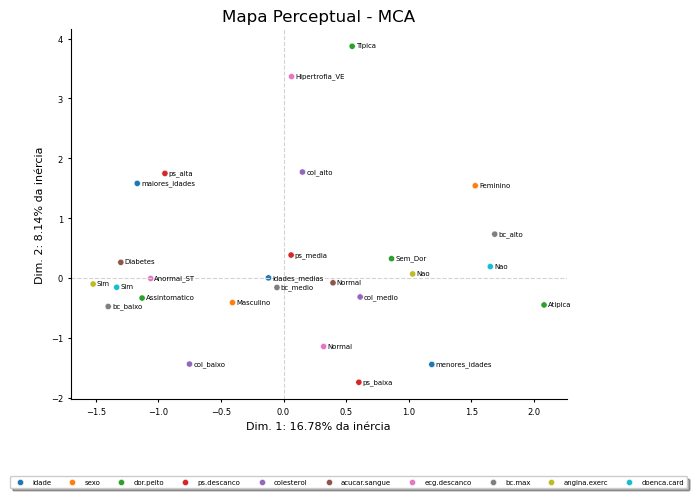

In [29]:
# Primeiro passo: gerar um DataFrame detalhado

chart = coord_padrao.reset_index()

nome_categ=[]
for col in dados_mca:
    nome_categ.append(dados_mca[col].sort_values(ascending=True).unique())
    categorias = pd.DataFrame(nome_categ).stack().reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart,
                             'categoria_id': categorias[0]})

# Segundo passo: gerar o gráfico de pontos
    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria_id'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(1.25,-0.2), fancybox=True, shadow=True, ncols=10, fontsize='5')
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()

# Gráfico das observações

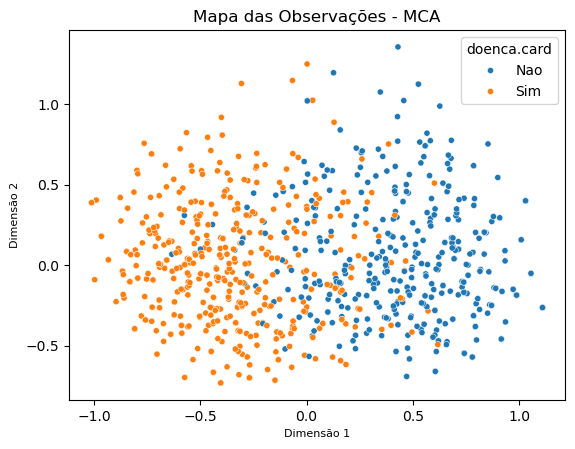

In [30]:
coord_obs['doenca.card'] = dados_mca['doenca.card']

sns.scatterplot(data=coord_obs, x=0, y=1, hue='doenca.card', s=20)
plt.title("Mapa das Observações - MCA", fontsize=12)
plt.xlabel("Dimensão 1", fontsize=8)
plt.ylabel("Dimensão 2", fontsize=8)
plt.show()

# FIM!